In [1]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load the CSV file into a pandas DataFrame
corona = pd.read_csv('../Reddit_Sentiments/corona_sentiments.csv')
corona = corona[corona['sentiment_polarity_summary']=='negative']
corona.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4858 entries, 0 to 9758
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.1                4858 non-null   int64  
 1   Unnamed: 0                  4858 non-null   int64  
 2   id                          4858 non-null   object 
 3   author                      4858 non-null   object 
 4   title                       4858 non-null   object 
 5   score                       4858 non-null   int64  
 6   comms_num                   4858 non-null   int64  
 7   created                     4858 non-null   float64
 8   timestamp                   4858 non-null   object 
 9   commenter                   3692 non-null   object 
 10  comment                     4836 non-null   object 
 11  top_lvl                     4858 non-null   int64  
 12  sentiment_polarity          4858 non-null   float64
 13  cluster                     4858 

In [4]:
#get unique id
ids = list(corona['id'].unique())
len(ids)

20

<h1>CORONA</h1>

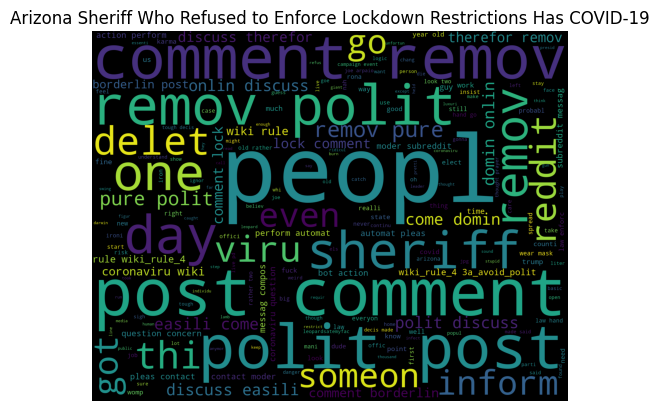

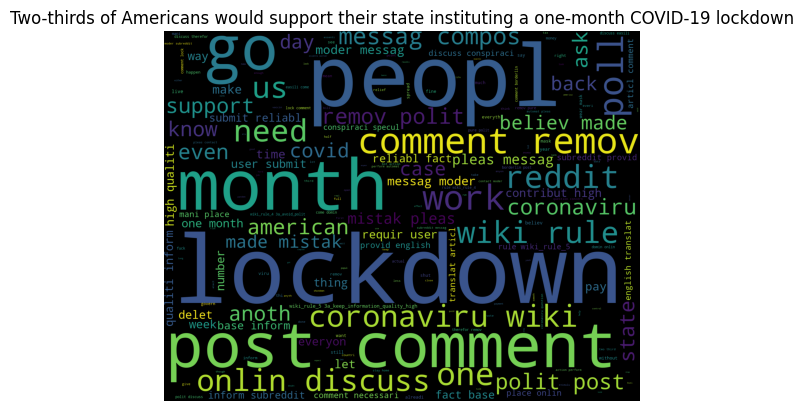

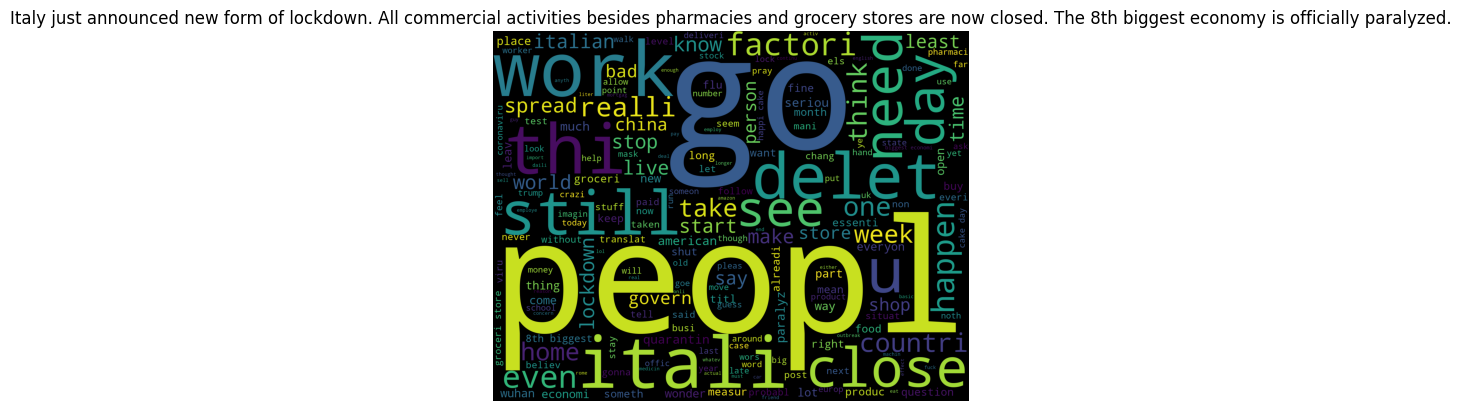

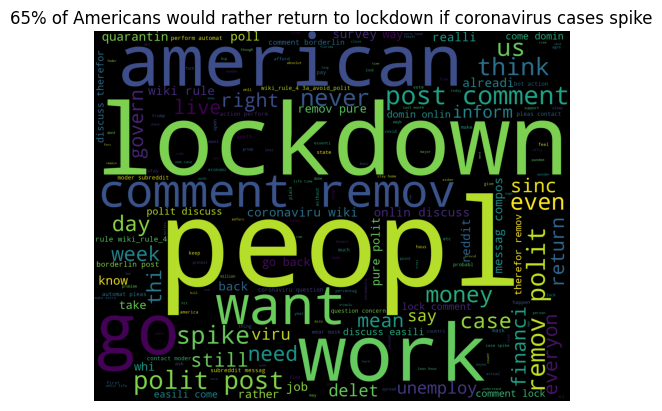

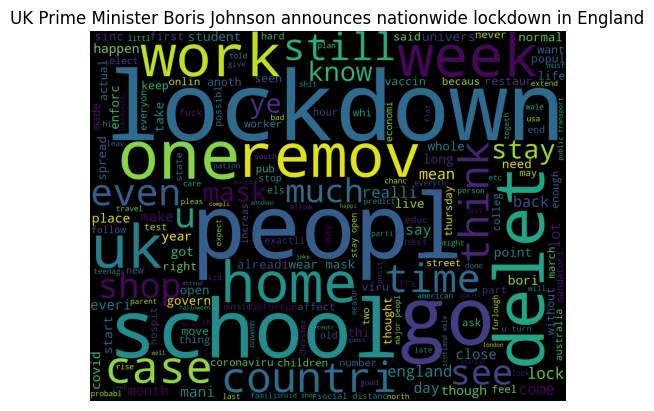

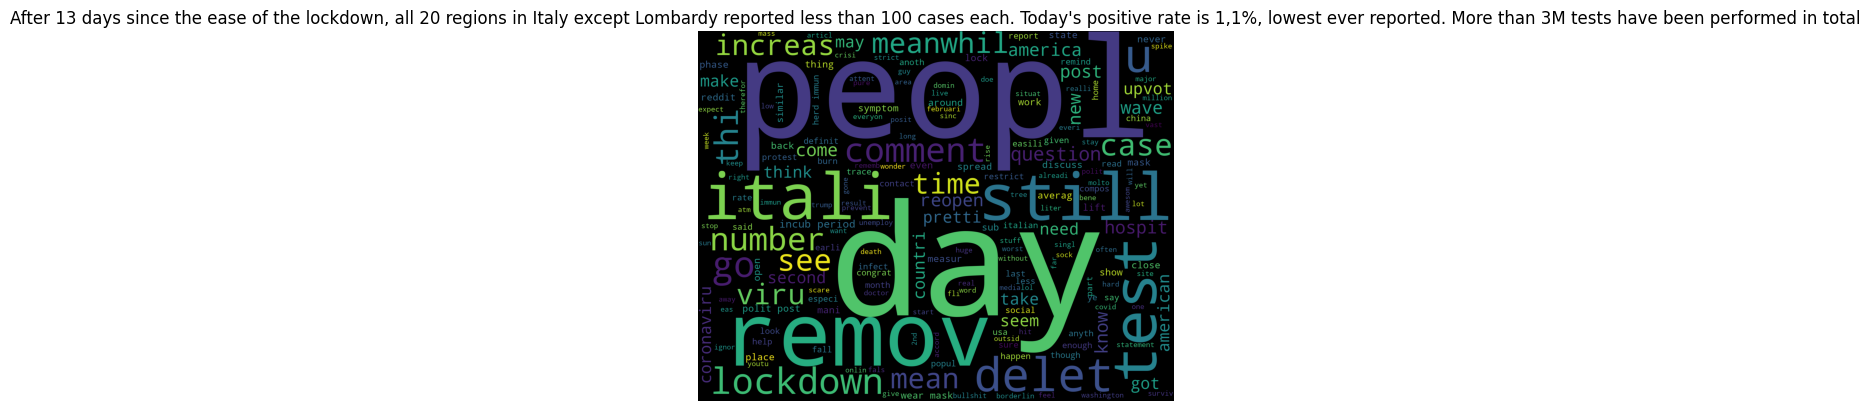

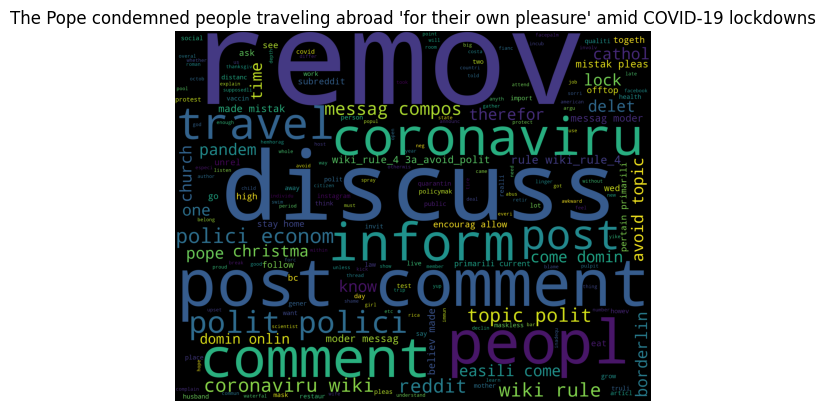

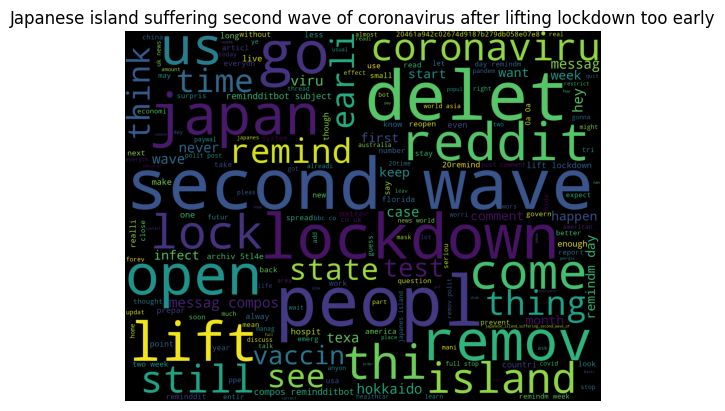

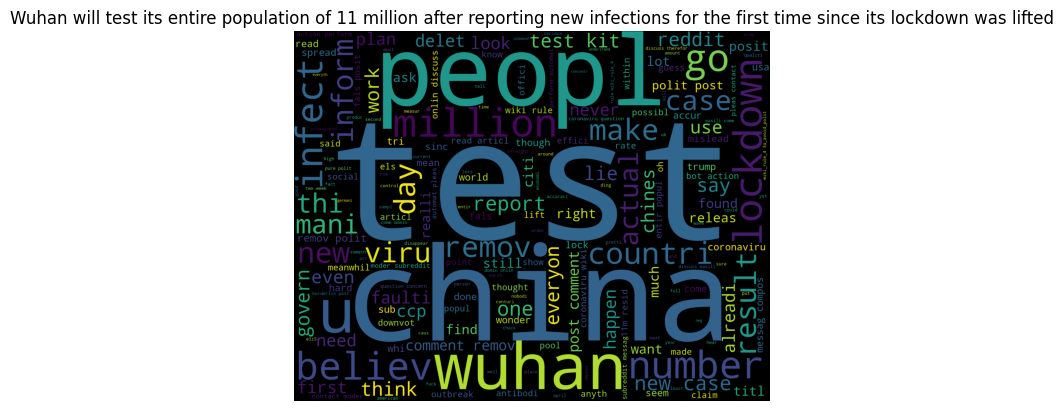

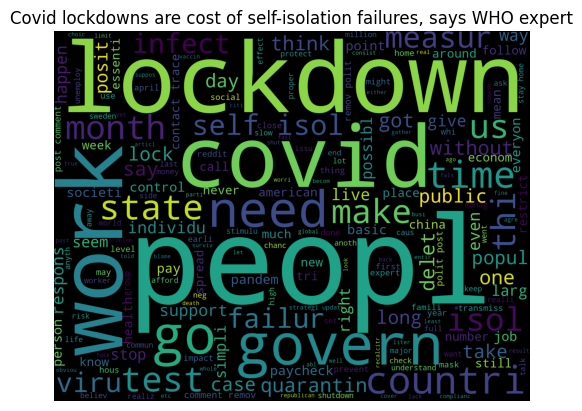

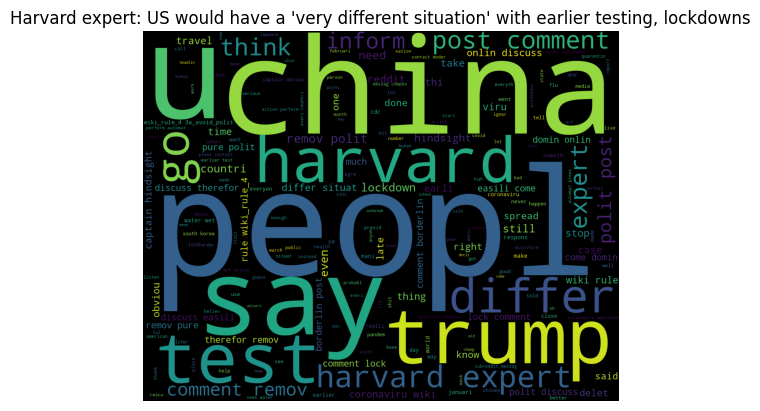

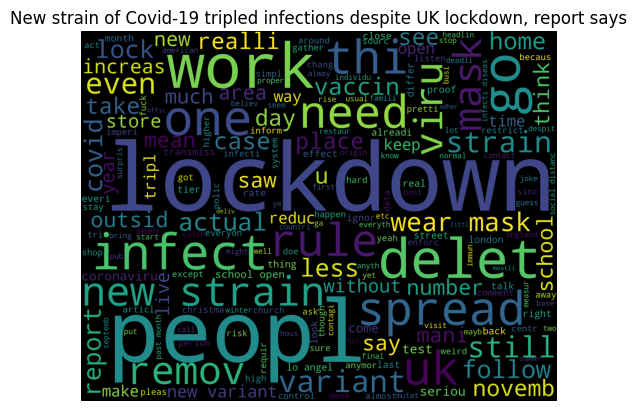

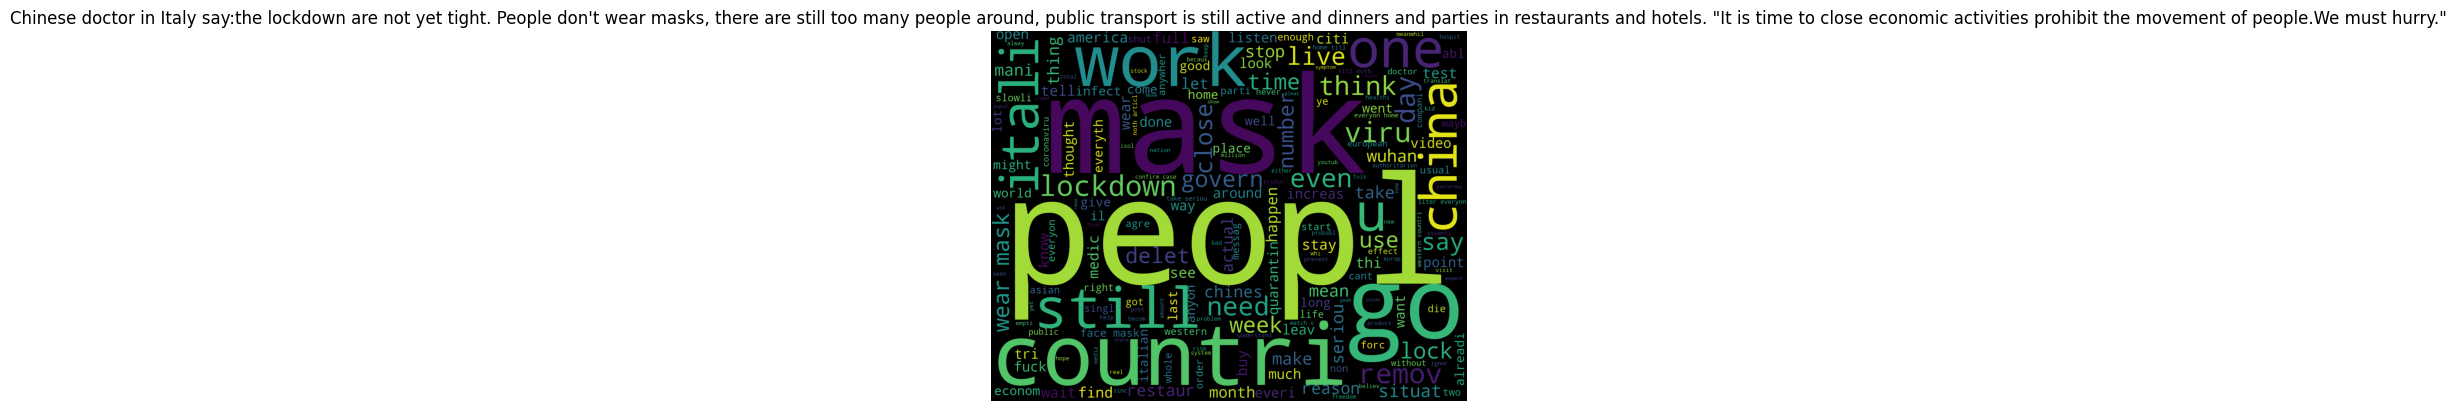

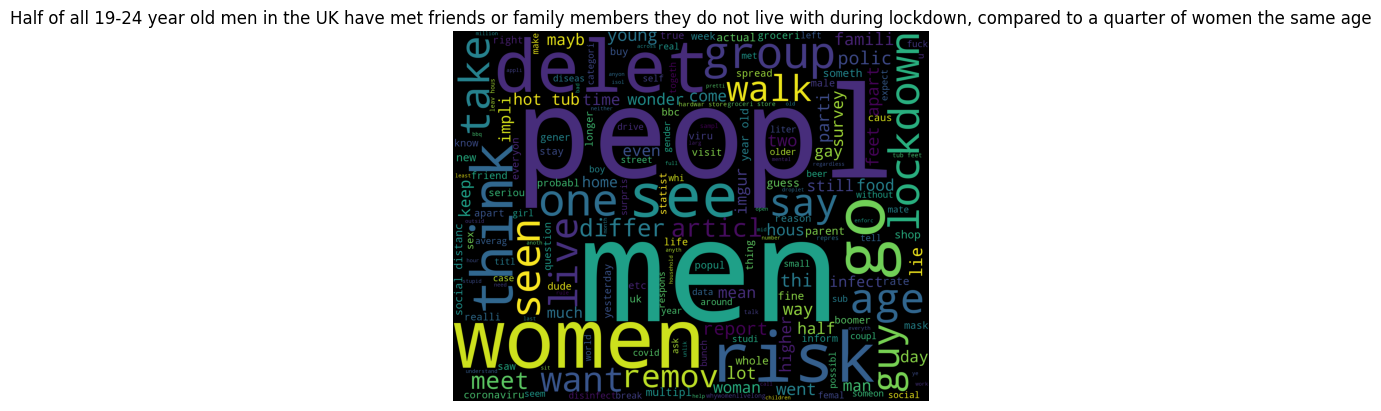

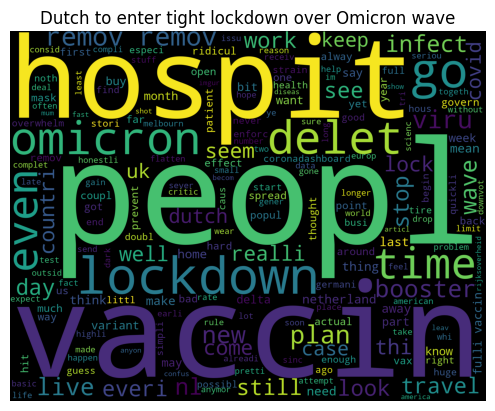

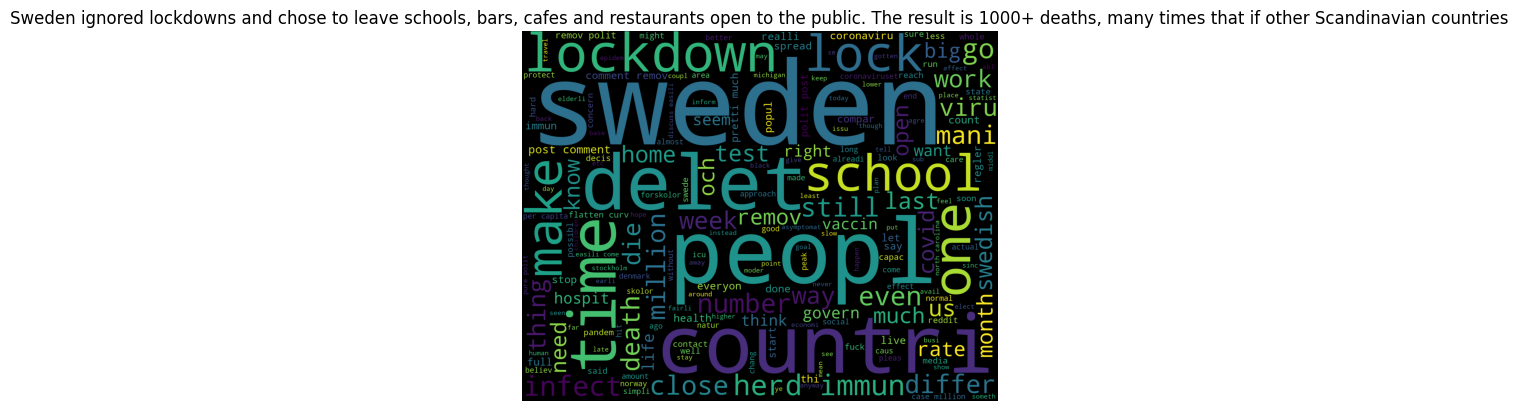

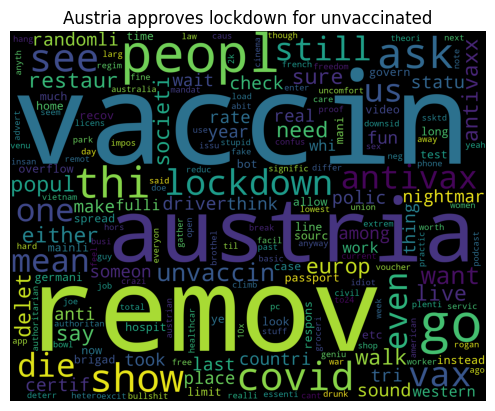

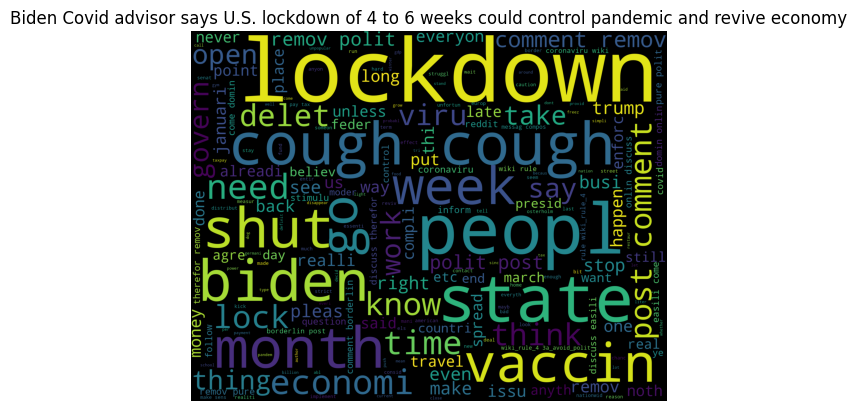

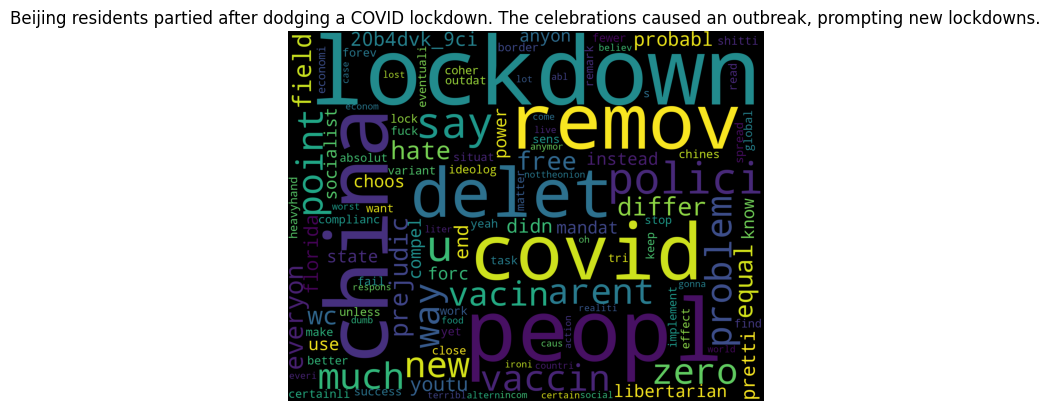

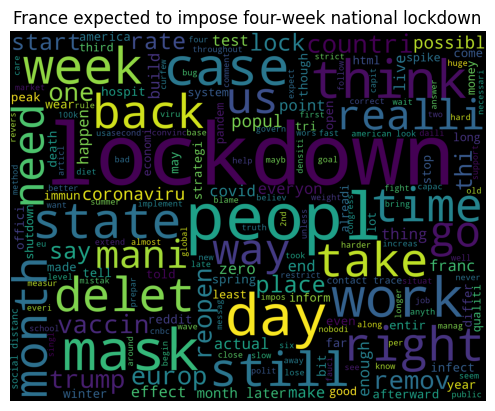

In [4]:
for id in ids:
    comments_list = list(corona['comment'][corona.id==id])
    comments = " ".join([str(x) for x in comments_list])
    word_cloud = WordCloud(background_color='black',
                       width=1800,
                       height=1400).generate(comments)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.title(str(corona['title'].loc[corona['id']==id].iloc[0]))
    plt.show()
    